In [1]:
import numpy as np
import pandas as pd
import os

# Load and prepare Titanic data
#os.chdir('C:\\Users\\Greg\\Desktop\\Kaggle\\titanic') # Set working directory

titanic_train = pd.read_csv(r"C:\Users\Osula\Documents\Projects\Kaggle Competitions\Titanic Tutorial\train.csv") # Read the data
print(titanic_train.head(), titanic_train.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   (8

**Data Dictionary**

Variable |Definition                                 |Key                                            
---------|-------------------------------------------|-----------------------------------------------
survival |Survival 	                                 |0 = No, 1 = Yes                                
pclass   |Ticket class 	                             |1 = 1st, 2 = 2nd, 3 = 3rd                      
sex 	 |Sex                                        |                                               
Age 	 |Age in years                               |                                               
sibsp 	 |# of siblings / spouses aboard the Titanic |                                               
parch 	 |# of parents / children aboard the Titanic |                                               
ticket 	 |Ticket number                              |                                               
fare 	 |Passenger fare                             |                                               
cabin 	 |Cabin number                               |                                               
embarked |Port of Embarkation 	                     |C = Cherbourg, Q = Queenstown, S = Southampton 


**Variable Notes**

*pclass*: A proxy for socio-economic status (SES)            
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

*age*: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*sibsp*: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

*parch*: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

*Some children travelled only with a nanny, therefore parch=0 for them.*

In [2]:
# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Set the seed
np.random.seed(12)

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert some variables to numeric
titanic_train["Sex"] = label_encoder.fit_transform(titanic_train["Sex"])
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
644+168+77

889

In [9]:
891-889

2

In [11]:
titanic_train["Embarked"] = titanic_train["Embarked"].factorize()[0] 
#pandas.factorize function takes care of the nans automatically (assigns them -1)

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [12]:
titanic_train["Embarked"].value_counts()

 0    644
 1    168
 2     77
-1      2
Name: Embarked, dtype: int64

In [52]:
titanic_train["Fare"].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

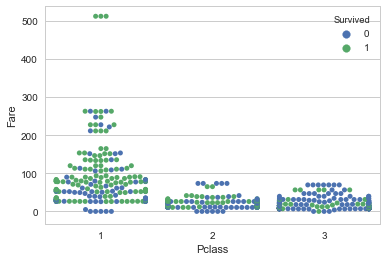

In [57]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', color_codes=True)
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=titanic_train)

In [58]:
titanic_train.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [59]:
titanic_train.groupby(['Survived', 'Pclass'])['Fare'].median()

Survived  Pclass
0         1         44.7500
          2         13.0000
          3          8.0500
1         1         77.9583
          2         21.0000
          3          8.5167
Name: Fare, dtype: float64

In [13]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=2,    # Num features considered
                                  oob_score=True)    # Whether to use out-of-bag samples to estimate the generalization accuracy.
# RandomForestClassifier is trained using bootstrap aggregation, where each new tree is fit from a bootstrap sample of the 
    #training observations z_i = (x_i, y_i)
# The out-of-bag (OOB) error is the average error for each z_i calculated using predictions from the trees that do not contain 
    #z_i in their respective bootstrap sample. This allows the RandomForestClassifier to be fit and validated whilst being 
    #trained

features = ["Sex","Pclass","SibSp","Embarked","Age","Fare"]

# Train the model
rf_model.fit(X=titanic_train[features],
             y=titanic_train["Survived"])

print("OOB accuracy: ")
print(rf_model.oob_score_)

OOB accuracy: 
0.820426487093


Since random forest models involve building trees from random subsets or "bags" of data, model performance can be estimated by making predictions on the out-of-bag (OOB) samples instead of using cross validation. You can use cross validation on random forests, but OOB validation already provides a good estimate of performance and building several random forest models to conduct K-fold cross validation with random forest models can be computationally expensive.

The random forest classifier assigns an importance value to each feature used in training. Features with higher importance were more influential in creating the model, indicating a stronger association with the response variable.

In [14]:
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature, imp)

Sex 0.269077735215
Pclass 0.0878819040855
SibSp 0.0499884815949
Embarked 0.0316234521203
Age 0.272570742328
Fare 0.288857684656


In [15]:
titanic_test = pd.read_csv(r"C:\Users\Osula\Documents\Projects\Kaggle Competitions\Titanic Tutorial\test.csv")
print(titanic_test.head(), titanic_test.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S   (418, 11)


In [18]:
# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(),
                       titanic_test["Age"].median(),                      
                       titanic_test["Age"])      
print('Median Age: ', titanic_test["Age"].median())
print(new_age_var)

Median Age:  27.0
[ 34.5   47.    62.    27.    22.    14.    30.    26.    18.    21.    27.
  46.    23.    63.    47.    24.    35.    21.    27.    45.    55.     9.
  27.    21.    48.    50.    22.    22.5   41.    27.    50.    24.    33.
  27.    30.    18.5   27.    21.    25.    27.    39.    27.    41.    30.
  45.    25.    45.    27.    60.    36.    24.    27.    20.    28.    27.
  10.    35.    25.    27.    36.    17.    32.    18.    22.    13.    27.
  18.    47.    31.    60.    24.    21.    29.    28.5   35.    32.5   27.
  55.    30.    24.     6.    67.    49.    27.    27.    27.    27.    18.
  27.     2.    22.    27.    27.    27.    25.    25.    76.    29.    20.
  33.    43.    27.    27.    26.    16.    28.    21.    27.    27.    18.5
  41.    27.    36.    18.5   63.    18.    27.     1.    36.    29.    12.
  27.    35.    28.    27.    17.    22.    27.    42.    24.    32.    53.
  27.    27.    43.    24.    26.5   26.    23.    40.    10.    33. 

In [23]:
titanic_test["Age"] = new_age_var 
print(titanic_test.head(), titanic_test.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S   (418, 11)


In [24]:
# Convert some variables to numeric
titanic_test["Sex"] = label_encoder.fit_transform(titanic_test["Sex"])
titanic_test["Embarked"] = titanic_test["Embarked"].factorize()[0]
print(titanic_test.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         0  
1  47.0      1      0   363272   7.0000   NaN         1  
2  62.0      0      0   240276   9.6875   NaN         0  
3  27.0      0      0   315154   8.6625   NaN         1  
4  22.0      1      1  3101298  12.2875   NaN         1  


In [25]:
titanic_test["Embarked"].value_counts()

1    270
2    102
0     46
Name: Embarked, dtype: int64

In [51]:
missing = titanic_test.columns[titanic_test.isnull().any()] # shows all columns with missing values in dataframe

Index(['Fare', 'Cabin'], dtype='object')

In [60]:
# Make test set predictions
#test_preds = rf_model.predict(X= titanic_test[features])